In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
import category_encoders as ce

np.random.seed(1)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns; sns.set()

In [2]:
#https://www.kaggle.com/klmsathishkumar/predict-your-bmi-here
def ordinal_encoding(df,col,mapping):
    ordinal_encoder = ce.OrdinalEncoder(cols = [col],return_df = True,mapping = [{'col':col,'mapping':mapping}])
    df_final = ordinal_encoder.fit_transform(df)
    return df_final

# Import Data

In [3]:
data_wine = pd.read_csv('Datasets/wine/wine.csv')
data_wine = data_wine.sample(n=1000, random_state=1)
data_wine = data_wine.dropna()

In [4]:
y = data_wine['quality']

In [5]:
data_wine = data_wine.drop(columns = ['quality'])

# Preprocess

In [6]:
scaler = StandardScaler()

In [7]:
columns = data_wine.columns

In [8]:
data_wine = scaler.fit_transform(data_wine)

In [9]:
data_wine = pd.DataFrame(data_wine, columns = columns)

In [10]:
nan_wine = data_wine.mask(np.random.random(data_wine.shape) < .1)
mod_wine = nan_wine.fillna(nan_wine.median())
nan_wine = pd.concat([y, nan_wine], axis = 1)
nan_wine = nan_wine.dropna()
y_nan = nan_wine['quality']
nan_wine = nan_wine.drop(columns=['quality'])

# Split Data

In [11]:
X_train_nan, X_test_nan, y_train_nan, y_test_nan = train_test_split(nan_wine, y_nan, test_size=0.33, random_state=0)
X_train_mod, X_test_mod, y_train_mod, y_test_mod = train_test_split(mod_wine, y, test_size=0.33, random_state=0)

# Models

In [12]:
discriminative = LogisticRegression(random_state = 0)
generative = GaussianNB()
    
discriminative.fit(X_train_nan, y_train_nan)
generative.fit(X_train_nan, y_train_nan)
    
dis_nan = discriminative.score(X_test_nan, y_test_nan)
gen_nan = generative.score(X_test_nan, y_test_nan)

In [13]:
discriminative = LogisticRegression(random_state = 0)
generative = GaussianNB()
    
discriminative.fit(X_train_mod, y_train_mod)
generative.fit(X_train_mod, y_train_mod)
    
dis_mod = discriminative.score(X_train_mod, y_train_mod)
gen_mod = generative.score(X_train_mod, y_train_mod)

In [14]:
print (f'Discriminativo con NaN: {dis_nan}\nDiscriminativo modificado: {dis_mod}\ndiff: {dis_mod-dis_nan}\n')
print (f'Generativo con NaN: {gen_nan}\nGenerativo modificado: {gen_mod}\ndiff: {gen_mod-gen_nan}')

Discriminativo con NaN: 0.42424242424242425
Discriminativo modificado: 0.6
diff: 0.17575757575757572

Generativo con NaN: 0.24242424242424243
Generativo modificado: 0.5597014925373134
diff: 0.31727725011307095


In [15]:
def run_test(prob, data_students, medida='mean'):
    # Create Noise
    np.random.seed(42)
    nan_students = data_students.mask(np.random.random(data_students.shape) < prob)
    if medida == 'mean':
        mod_students = nan_students.fillna(nan_students.mean())
    elif medida == 'median':
        mod_students = nan_students.fillna(nan_students.median())
    nan_students = pd.concat([y, nan_students], axis = 1)
    nan_students = nan_students.dropna()
    y_nan = nan_students['quality']
    nan_students = nan_students.drop(columns=['quality'])
    
    # Split Data
    X_train_nan, X_test_nan, y_train_nan, y_test_nan = train_test_split(nan_students, y_nan, test_size=0.33, random_state=0)
    X_train_mod, X_test_mod, y_train_mod, y_test_mod = train_test_split(mod_students, y, test_size=0.33, random_state=0)

    # With Nan
    discriminative = LogisticRegression(random_state = 0)
    generative = GaussianNB()
    
    discriminative.fit(X_train_nan, y_train_nan)
    generative.fit(X_train_nan, y_train_nan)
    
    dis_nan = discriminative.score(X_test_nan, y_test_nan)
    mod_nan = generative.score(X_test_nan, y_test_nan)
    
    # Without Nan
    discriminative = LogisticRegression(random_state = 0)
    generative = GaussianNB()
    
    discriminative.fit(X_train_mod, y_train_mod)
    generative.fit(X_train_mod, y_train_mod)
    
    dis_mod = discriminative.score(X_train_mod, y_train_mod)
    gen_mod = generative.score(X_train_mod, y_train_mod)
    
    return (dis_mod-dis_nan, gen_mod-gen_nan)

In [16]:
def plot_test(x, dis, gen):
    figure(figsize=(15, 8), dpi=80)
    plt.plot(x, dis, label = 'disc')
    plt.plot(x, gen, label = 'gen')
    plt.legend()
    plt.show()

In [22]:
test_values = [.1, .2, .3, .35,  .4]

In [23]:
values = [run_test(i, data_wine, 'mean') for i in test_values]

In [24]:
gen = []
dis = []
for d, g in values:
    dis.append(d)
    gen.append(g)

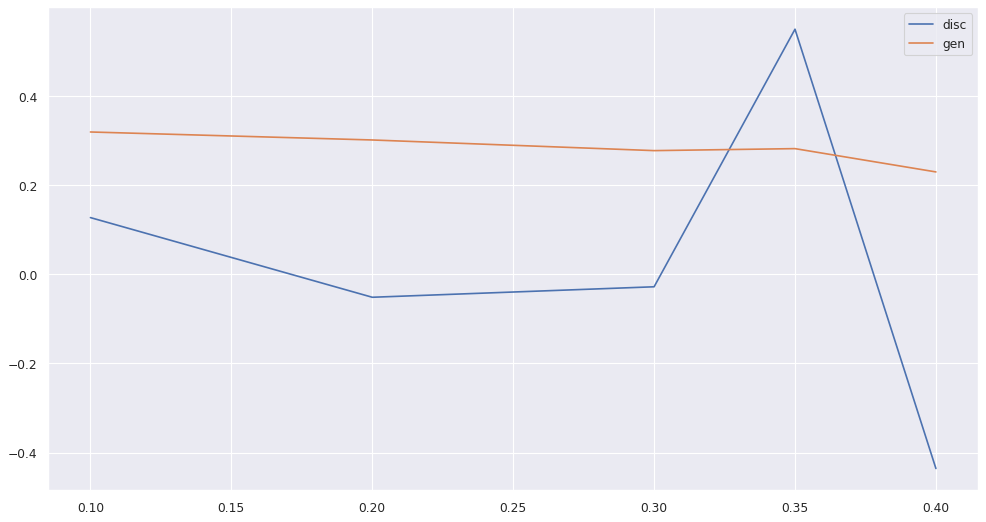

In [25]:
plot_test(test_values, dis, gen)